In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


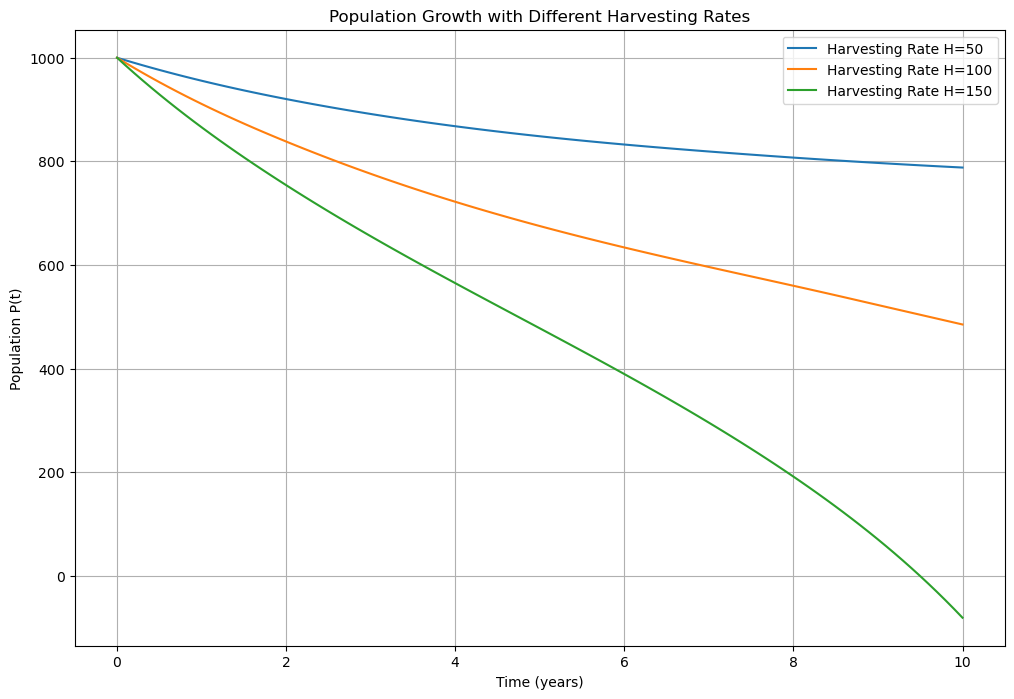

In [20]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

r = 0.25  # annual growth rate
K = 1000  # carrying capacity
H_values = [50, 100, 150]  # array of harvesting rates
P0 = K  # initial population (half of the carrying capacity)

# Time span for the simulation from t=0 to t=10
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100)  # 100 time points for plotting

# Population growth model function
def population_growth(t, P, r, K, H):
    return r * P * (1 - P / K) - H

# Plotting the population over time for different harvesting rates
plt.figure(figsize=(12, 8))

for H in H_values:
    # Solve the differential equation
    sol = solve_ivp(population_growth, t_span, [P0], args=(r, K, H), t_eval=t_eval)
    
    # Plot the results
    plt.plot(sol.t, sol.y[0], label=f'Harvesting Rate H={H}')

# Add graph labels and legend
plt.title('Population Growth with Different Harvesting Rates')
plt.xlabel('Time (years)')
plt.ylabel('Population P(t)')
plt.legend()
plt.grid(True)
plt.savefig("plots/plot1.png")
plt.show()


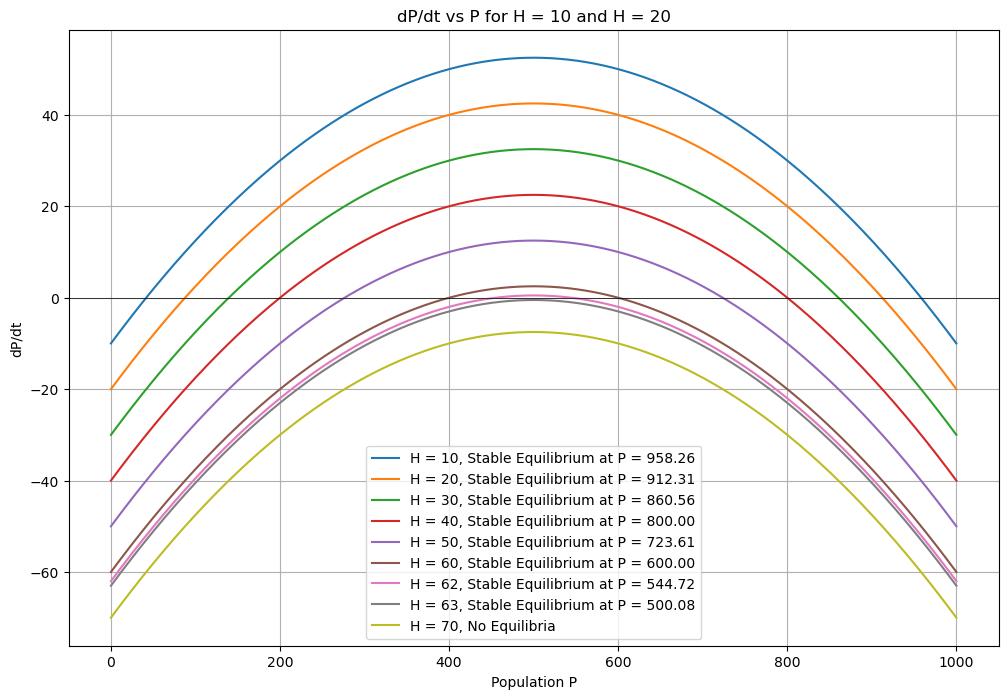

In [28]:
# Parameters for the sketch
r = 0.25  # annual growth rate
K = 1000  # carrying capacity
H_values = [10, 20, 30, 40, 50, 60, 62, 63,  70]  # harvesting rates to find zeros

# Define the function for dP/dt
def dP_dt(P, r, K, H):
    return r * P * (1 - P / K) - H

# Create a range of P values to evaluate the function
P = np.linspace(0, K, 400)

# Plot dP/dt vs P for several values of H
plt.figure(figsize=(12, 8))

# Find equilibrium points for H=10 and H=20 and add them to the legend
for H in H_values:
    # Define the function to find zeros (equilibrium points)
    def eq_points(P):
        return dP_dt(P, r, K, H)
    
    # Use fsolve to find the equilibrium points, using P=K/2 as an initial guess
    eq_point = fsolve(eq_points, K)
    
    # Plot the function dP/dt vs P
    if H != 70:
        plt.plot(P, dP_dt(P, r, K, H), label=f'H = {H}, Stable Equilibrium at P = {eq_point[0]:.2f}')
    else:
        plt.plot(P, dP_dt(P, r, K, H), label=f'H = {H}, No Equilibria')


# Add labels and legend to the plot
plt.title('dP/dt vs P for H = 10 and H = 20')
plt.xlabel('Population P')
plt.ylabel('dP/dt')
plt.axhline(0, color='black', linewidth=0.5) 
plt.legend()
plt.grid()
plt.savefig("plots/plot2.png")
plt.show()